In [588]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,10]
plt.rcParams.update({'font.size' : 12})

In [643]:
V = 1
f = 50
omega = 2*np.pi*f
phi = 0

f_vco = 0
omega_vco = 2*np.pi*f_vco
phi_vco = 0

dt = 0.000078125
t = np.arange(0,0.02*30,dt)


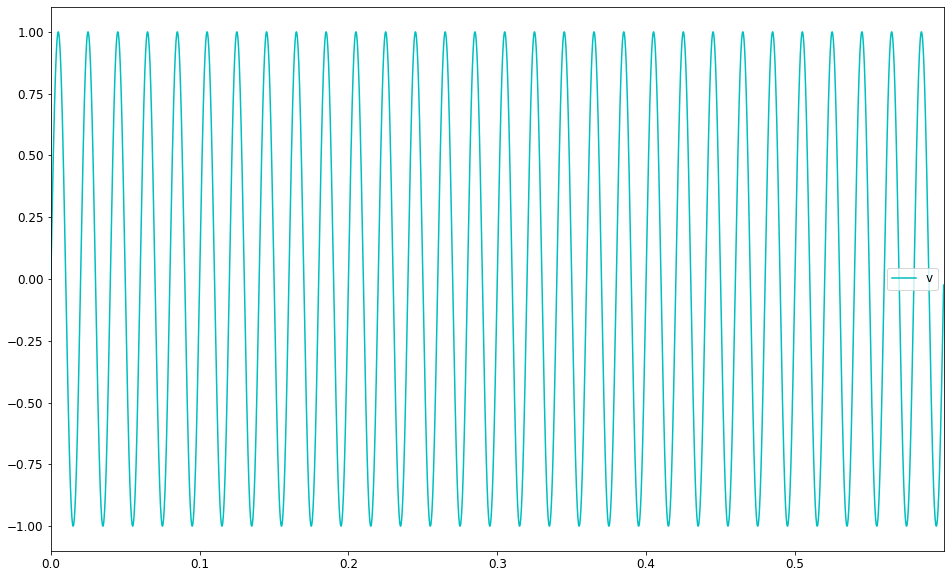

In [644]:
v = V*np.sin(omega*t + phi)

plt.plot(t,v,color='c', label='v')
plt.xlim(t[0],t[-1])
plt.legend()

In [420]:
# Phase Detector
# vi : input to the Phase Detector
# vo_vco : output from the VCO

def Phase_Detector(vi,vo_vco):
 
    Err_PD = vi*vo_vco*Phase_Detector.Kpd
    
    return Err_PD
  

In [421]:
# Loop Filter
def Loop_Filter(Err):

    Loop_Filter.Integ_Err += Err
    v_LF = Loop_Filter.kp*Err + Loop_Filter.ki*Loop_Filter.Integ_Err   
    return v_LF


In [647]:
def VCO(v_LF):

    VCO.omega_c = 2*np.pi*VCO.f_c
    
    VCO.omega_vco = VCO.omega_c + (VCO.k_vco * v_LF)
    VCO.theta_vco += VCO.omega_vco * dt
    
    if(VCO.theta_vco >= 2*np.pi):
        VCO.theta_vco = 0
    
    return VCO.omega_vco,VCO.theta_vco,np.cos(VCO.theta_vco)


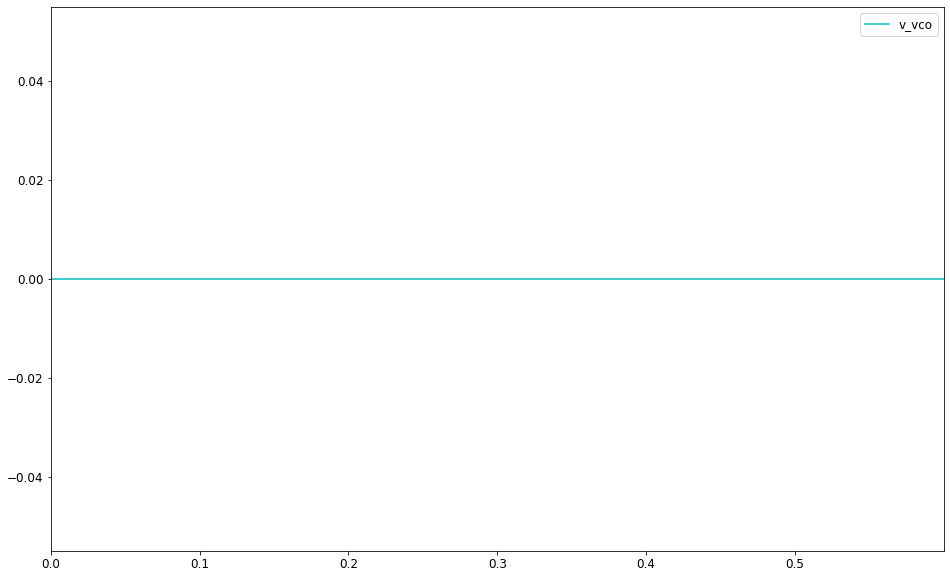

In [656]:
# v_vco = np.cos(omega_vco*t + phi_vco) 
v_vco = np.zeros(len(t))
plt.plot(t,v_vco,color='c', label='v_vco')
plt.xlim(t[0],t[-1])
plt.legend()

In [655]:
# Parameter Values

Phase_Detector.Kpd = 1

Loop_Filter.kp = 502.655
Loop_Filter.ki = 0.0051
Loop_Filter.Integ_Err = 0

VCO.k_vco = 1
VCO.f_c = 50
VCO.theta_vco = 0

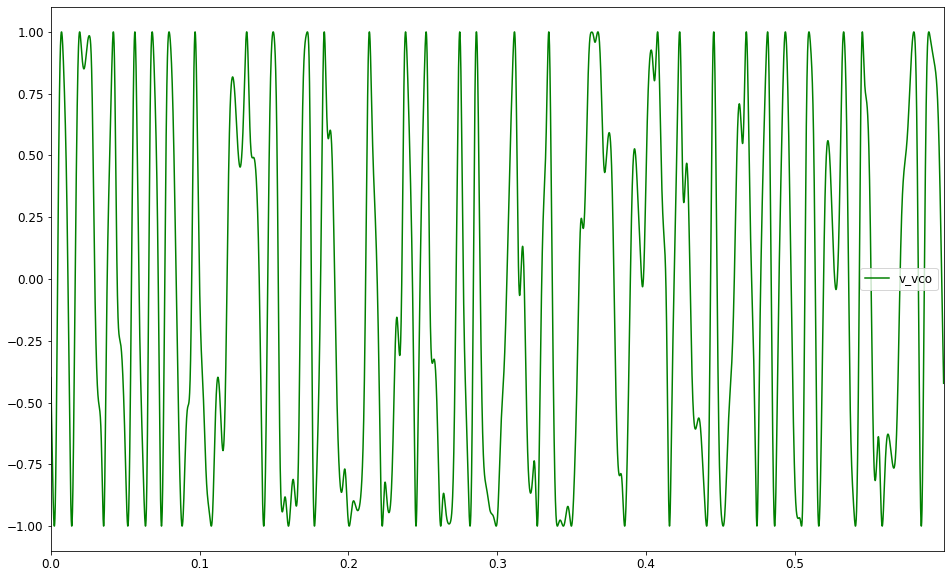

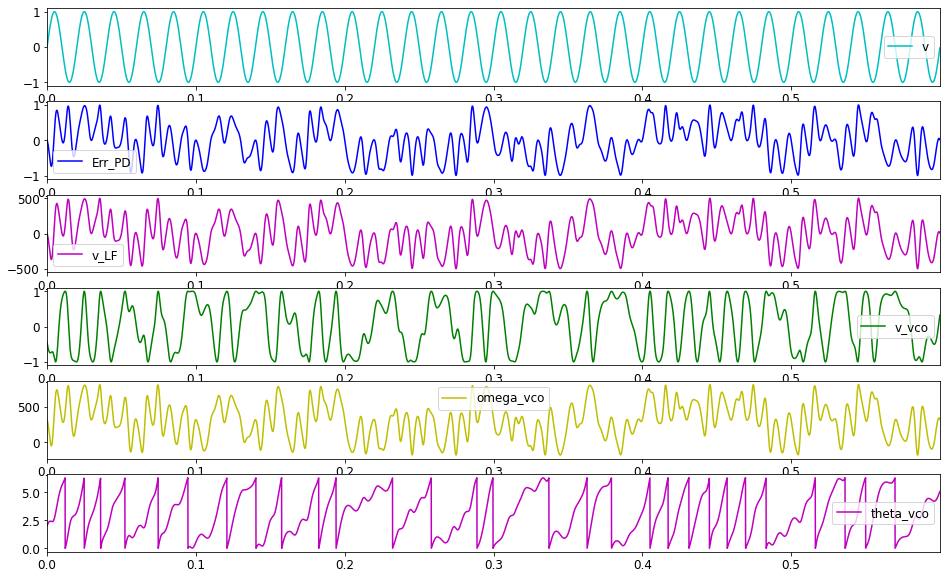

In [664]:
# Elementry PLL

Err_PD = np.zeros(len(t))
v_LF = np.zeros(len(t))
Omega_vco = np.zeros(len(t))
Theta_vco = np.zeros(len(t))

plt.plot(t,v_vco,color='g', label='v_vco')
plt.xlim(t[0],t[-1])
plt.legend()

for j in range(1):
    for i in range(len(t)):
        Err_PD[i] = Phase_Detector(v[i],v_vco[i])
        v_LF[i] = Loop_Filter(Err_PD[i])
        Omega_vco[i], Theta_vco[i], v_vco[i] = VCO(v_LF[i])     


fig,axs = plt.subplots(6,1)

plt.sca(axs[0])
plt.plot(t,v,color='c', label='v')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,Err_PD,color='b', label='Err_PD')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(t,v_LF,color='m', label='v_LF')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[3])
plt.plot(t,v_vco,color='g', label='v_vco')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[4])
plt.plot(t,Omega_vco,color='y', label='omega_vco')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[5])
plt.plot(t,Theta_vco,color='m', label='theta_vco')
plt.xlim(t[0],t[-1])
plt.legend()

plt.show()